###### Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under MIT License. (c)2018 Lorena A. Barba, Olivier Mesnard. Thanks: Microsoft Azure Sponsorship.

# Microsoft Azure Sponsorship: Cost Analysis

In [1]:
import os
import pandas
import numpy
from matplotlib import pyplot
%matplotlib inline
pyplot.style.use('seaborn-dark')

# load style of notebook
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
display(css_styling(os.path.join('styles', 'custom.css')))

In [2]:
filepath = os.path.join('data', 'AzureUsage_all.csv')
raw_data = pandas.read_csv(filepath)

In [3]:
raw_data.columns

Index(['SubscriptionName', 'SubscriptionGuid', 'Date', 'ResourceGuid',
       'ServiceName', 'ServiceType', 'ServiceRegion', 'ServiceResource',
       'Quantity', 'Cost'],
      dtype='object')

Our Azure bill reports:

* `SubscriptionName`, the name of the subscription (`Microsoft Azure Sponsorship` in our case);
* `SubscriptionGuid`, the id of the subscription (`{4C217C02-7B06-42DA-B13C-E8DE392FBD00}` in our case);
* `Date`, the date of the charge;
* `ResourceGuid`;
* `ServiceName`;
* `ServiceType`;
* `ServiceRegion`;
* `ServiceResource`;
* `Quantity`;
* `Cost`.

We do not need all columns for our cost analysis; let's keep only the interesting ones: `Date`, `ServiceName`, `ServiceType`, `ServiceRegion`, `ServiceResource`, `Quantity`, and `Cost`.

In [4]:
# keep interesting columns
columns = ['Date', 'ServiceName', 'ServiceType',
           'ServiceRegion', 'ServiceResource',
           'Quantity', 'Cost']
data = raw_data[columns]

In [5]:
print('Start: {}, end: {}'.format(data['Date'].values[0], data['Date'].values[-1]))
print('Total cost: {}'.format(data['Cost'].values.sum()))

Start: 4/30/2017, end: 1/3/2018
Total cost: 18436.588668610297


Microsoft Azure Sponsorship granted us 20,000 USD to evaluate their cloud platform and run Computational Fluid Dynamics simulations with our in-house MPI-based software [PetIBM](https://github.com/barbagroup/PetIBM).
Between April 30, 2017 and January 3, 2018, we have spent 18,437 USD on Microsoft Azure.

### Types of charge

In [6]:
data['ServiceName'].unique()

array(['Data Management', 'Virtual Machines', 'Networking', 'Storage'], dtype=object)

During that period, we have been charged for the following services:
* `Data Management`,
* `Virtual Machines`,
* `Networking`,
* `Storage`.

In [7]:
mask = data['ServiceName'] == 'Virtual Machines'
display(data[mask]['ServiceType'].unique())
display(data[mask]['ServiceResource'].unique())

array(['Standard_NC24 VM', 'Standard_NC12 VM', 'Standard_NC24r VM',
       'Standard_H16mr VM', 'A9 VM', 'Standard_NC6 VM', 'A8 VM'], dtype=object)

array(['Compute Hours'], dtype=object)

We used various instances of virtual machines on Microsoft Azure and have been charged in terms of compute hours.

In [8]:
mask = data['ServiceName'] == 'Data Management'
data[mask]['ServiceResource'].unique()

array(['Standard IO - Table Read Operation Units (in 10,000s)',
       'Standard IO - Block Blob Write Operation Units (in 10,000s)',
       'Standard IO - Block Blob Read Operation Units (in 10,000s)',
       'Standard IO - Queue Operation Units (in 10,000s)',
       'Standard IO - File Protocol Operation Units (in 10,000s)',
       'Standard IO - File Read Operation Units (in 10,000s)',
       'Standard IO - Block Blob Delete Operation Units (in 10,000s)',
       'Standard IO - Table Write Operation Units (in 10,000s)',
       'Standard IO - Page Blob Write Operation Units (in 10,000s)',
       'Standard IO - Page Blob Read Operation Units (in 10,000s)',
       'Standard IO - Page Blob Delete Operation Units (in 10,000s)',
       'Standard IO - Block Blob List Operation Units (in 10,000s)',
       'Standard IO - File Write Operation Units (in 10,000s)',
       'Standard IO - File Delete Operation Units (in 10,000s)',
       'Storage Transactions (in 10,000s)',
       'Standard IO - F

In [9]:
mask = data['ServiceName'] == 'Networking'
data[mask]['ServiceResource'].unique()

array(['Data Transfer In (GB)', 'Data Transfer Out (GB)',
       'IP Address Hours'], dtype=object)

Networking charges include data transfer and allocation of public IP addresses.

In [10]:
mask = data['ServiceName'] == 'Storage'
data[mask]['ServiceResource'].unique()

array(['Standard Managed Disk/S4 (Units)', 'Standard IO - Block Blob (GB)',
       'Standard IO - Page Blob/Disk (GB)', 'Standard IO - Files (GB)',
       'Standard IO - Table (GB)', 'Standard Managed Disk/S10 (Units)',
       'Standard Managed Disk/S30 (Units)',
       'Standard IO - Queue Class 1 Operation Units'], dtype=object)

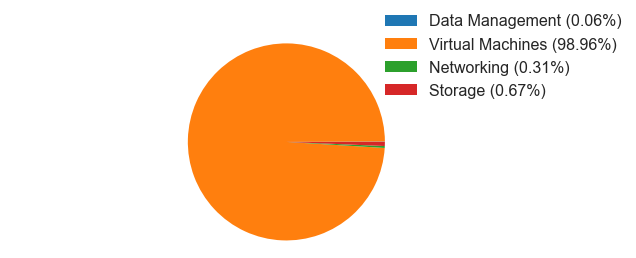

In [11]:
service_names = data['ServiceName'].unique()
total_cost = data['Cost'].values.sum()
costs = {}
for name in service_names:
    mask = data['ServiceName'] == name
    costs[name] = data[mask]['Cost'].values.sum()
    
fig, ax = pyplot.subplots(figsize=(10.0, 4.0))
sizes = [costs[name] / total_cost * 100.0
         for name in service_names]
labels = ['{} ({:.2f}%)'.format(name, size)
          for name, size in zip(service_names, sizes)]
patches, _ = ax.pie(sizes)
fig.legend(patches, labels, loc='upper right', prop={'size': 16})
ax.axis('equal');

Ok, almost all of the charges are from the usage of virtual machines (in terms of compute hours).

### Microsoft Azure instances used

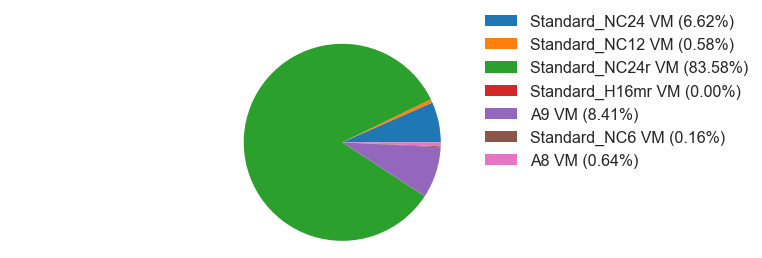

In [12]:
mask = data['ServiceName'] == 'Virtual Machines'
subdata = data[mask]
total_cost = subdata['Cost'].sum()
instances = subdata['ServiceType'].unique()
costs = {}
for instance in instances:
    mask = subdata['ServiceType'] == instance
    costs[instance] = subdata[mask]['Cost'].sum()

fig, ax = pyplot.subplots(figsize=(12.0, 4.0))
sizes = [costs[instance] / total_cost * 100.0
         for instance in instances]
labels = ['{} ({:.2f}%)'.format(instance, size)
          for instance, size in zip(instances, sizes)]
patches, _ = ax.pie(sizes)
fig.legend(patches, labels, loc='upper right', prop={'size': 16})
ax.axis('equal');

As seen above, we spent most of the money with the instances `Standard_NC24`, `Standard_NC24r`, and `A9`.

The `A9` instances were used to compare runtime obtained on test-cases between Microsoft Azure and our HPC University cluster, Colonial One.

The instance `Standard_NC24` was mostly used to compute the three-dimensional flow around a snake cylinder at Reynolds number 2000 with a 35-degree angle of attack on a mesh with 46 million cells.

The RDMA-capable instances `Standard_NC24r` were used to run the same simulation on a finer mesh (233 million cells).

## 3D simulations of the flying snake

### Re=2,000, AoA=35$^o$ (mesh A)

The simulation was run on a single instance NC24 (featuring 4 NVIDIA K80 GPU devices) in the South Central US region during May, 2017.
We logged into the node, installed PetIBM-0.2 and all its dependencies.
We used PETSc-3.7.4 and the shared library AmgX-1.2 (that comes with a temporary license).

In [13]:
mask = data['ServiceType'] == 'Standard_NC24 VM'
subdata = data[mask]
mask = subdata['ServiceRegion'] == 'US South Central'
subdata = subdata[mask]
mask = ((pandas.to_datetime(subdata['Date']) >= '2017-05-01') &
        (pandas.to_datetime(subdata['Date']) <= '2017-05-31'))
display(subdata[mask])

,Date,ServiceName,ServiceType,ServiceRegion,ServiceResource,Quantity,Cost
26,5/31/2017,Virtual Machines,Standard_NC24 VM,US South Central,Compute Hours,234.616758,1055.775411


Unfortunately, here, we just have access to charges accumulated over the month.

In [14]:
petsc_runtime = 5.33E+05 / 3600.0  # in hours
nc24_price = 3.96
print('Cost of the run: {} USD'.format(petsc_runtime * nc24_price))

Cost of the run: 586.3 USD


The runtime reported by PETSc is 148 hours.
With an hourly price of 3.96 USD for the NC24 instance, the cost of this run is 586.3 USD.
The cost displayed in the frame about is higher because we also have been running test-cases on the same instance during that month.

## Re=2,000, AoA=35$^o$ (mesh B)

We needed more than one NC24 instance to have enough memory on devices to solve the Poisson system on a mesh with 233 million cells.
We used the instances NC24r that are RDMA-capable.

We used Azure Batch services and Batch Shipyard to create the pools and the jobs, and to submit the tasks.

The task was submitted to Azure Batch on a pool of 6 NC24r nodes, each NC24r instance having an hourly cost of $3.96.

In [15]:
n_nodes = 6  # number of nodes in the pool
nc24r_price = 3.96  # hourly cost for a NC24r instance

We do not have the runtime from PETSc for the simulation as the run was killed because of the time-limit enforced on Azure Batch tasks (which was unknown to us at the time of submitting the task).

In [16]:
start, end = '2017-11-14', '2017-11-28'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
meshB2k35_data = data[mask]

mask = meshB2k35_data['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35_data[mask]

total_hours = subdata['Quantity'].sum()
print('- Total number of compute hours: {:.2f}'.format(total_hours))
print('- Number of compute hours per node: {:.2f}'
      .format(total_hours / n_nodes))
print('- Expected charge for the compute hours: ${:.2f}'
      .format(total_hours * nc24r_price))
print('- Reported charge: ${:.2f}'
      .format(subdata['Cost'].sum()))

- Total number of compute hours: 1638.00
- Number of compute hours per node: 273.00
- Expected charge for the compute hours: $6486.48
- Reported charge: $6486.48


This simulation was the first time we used Azure Batch services, creating the pool, the job, and the task with Batch Shipyard.
We submitted the task on November 14, 2017, at 3:50 pm and purposely killed on November 28, 2017, at 2:10 pm.

Why did we have to kill the job?

Our simulations run for a prescribed number of time steps and we save the numerical solution (pressure and velocity fields, convective and diffusive terms) at a certain frequency.
We also compute and write into file the aerodynamic forces every time step.
It appears that the numerical solution was output to files for the last time on November, 25, 2017, at 10:25 am, at a time step that is not the final time step.
Something went wrong during the task and the computation was not anymore running normally.
It took me about three days to realize that something was wrong!
Why so long?
I usually check the status of the task to make sure everything is ok.
The pool and job's task were still respectively marked as  "active" and "running", even if the computation was not running.
I even logged into the nodes an ran the "top" command-line utility to check the processes were still running.
However, the compute nodes on the Azure portal were marked as IDLE.

Seeking for help to Microsoft Azure, Fred Park, software engineer and main developer of Batch Shipyard, told us that Batch tasks have a 7-day time-limit enforced (from the time the task is submitted), a restriction that was not yet mentioned in the official documentation of Microsoft Azure.
(As pointed out by Fred Park, there is a not at the end of the documentation for Batch Shipyard; we missed it...)

Three days past between the last time the solution was output to files and the time we had the confirmation that the simulation was not running anymore so we had to kill the job and restart it.

Let's redo our cost analysis for this simulation with the following assumptions:

* the task started at 3:50 pm on November 14, 2017 and run for 8 hours and 10 minutes that day;
* the task ran normally until 10:25 am on November 25, 2017 for 10 hours and 25 minutes that day.

In [17]:
start, end = '2017-11-14', '2017-11-25'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
meshB2k35_data = data[mask]

mask = meshB2k35_data['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35_data[mask]

hours = subdata['Quantity'].values
# First day: assume run for 8 hours and 10 minutes
hours[0] = (8.0 + 10.0 / 60) * n_nodes
# Last running day: assume run for 10 hours and 25 minutes
hours[-1] = (10.0 + 25.0 / 60) * n_nodes

total_hours = hours.sum()
print('- Total number of compute hours: {:.2f}'.format(total_hours))
print('- Number of compute hours per node: {:.2f}'.format(total_hours / n_nodes))
print('- Expected charge for the compute hours: ${:.2f}'
      .format(total_hours * nc24r_price))
costs = subdata['Cost'].values
costs[0] = hours[0] * nc24r_price
costs[-1] = hours[-1] * nc24r_price
print('- Effective charge: ${:.2f}'.format(costs.sum()))

- Total number of compute hours: 1251.50
- Number of compute hours per node: 208.58
- Expected charge for the compute hours: $4955.94
- Effective charge: $4955.94


We can also estimate the money lost because we were not aware of this 7-day time-limit restriction for Azure Batch tasks:

In [18]:
start, end = '2017-11-25', '2017-11-28'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
loss_data = data[mask]

cost_20171125 = costs[-1]  # cost on December 25, 2017 when simulation was running

mask = loss_data['ServiceName'] == 'Virtual Machines'
loss_costs = loss_data['Cost'][mask].values
loss_costs[0] -= cost_20171125  # adjust to keep only money wasted
print('Total cost charged for the virtual machines while simulation not running: {} USD'
      .format(loss_costs.sum()))

Total cost charged for the virtual machines while simulation not running: 1344.42 USD


As said before, the simulation stopped running correctly on November 29, 2017, at 10:25 am an was killed on November 28, 2017, at 2:10 pm.
Thus, the pool was still allocated for 75 hours and 45 minutes.
With an hourly price of 3.96 USD for each of the 6 NC24r nodes, we would be expecting a charge of 1799.8 USD.
However, it appears that we were only chaged for 1344.4 USD.

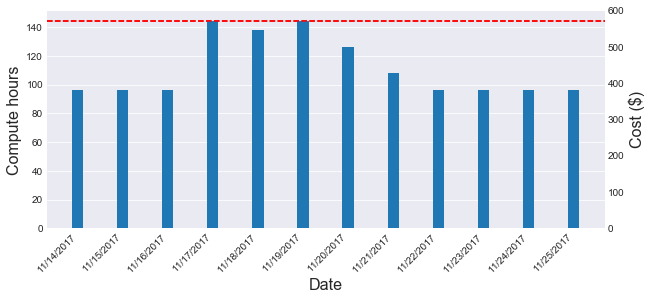

In [19]:
mask = meshB2k35_data['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35_data[mask]

dates = subdata['Date'].values
hours = subdata['Quantity'].values
costs = subdata['Cost'].values

fig, ax1 = pyplot.subplots(figsize=(10.0, 4.0))
ax1.yaxis.grid(zorder=0)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Compute hours', fontsize=16)
bar_width = 0.25
ax1.bar(numpy.arange(dates.size), hours,
        bar_width, zorder=1)
ax1.axhline(24.0 * n_nodes, color='red', linestyle='--')
ax1.set_xticks(numpy.arange(dates.size))
ax1.set_xticklabels(dates)
for label in ax1.get_xmajorticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

ax2 = ax1.twinx()
ax2.set_ylabel('Cost ($)', fontsize=16)
ax2.bar(numpy.arange(dates.size), costs,
        bar_width, zorder=1)
ax2.axhline(24.0 * n_nodes * nc24r_price, color='red', linestyle='--');

The figure above shows the number of compute hours and the cost charged daily when the task was running.
The dashed red line shows the values as if the simulation was computing during the full day.

It is surprising to see that we have been charged for 24 hours of computation only two days (11/17/2017 and 11/19/2017).

In [20]:
mask = pandas.to_datetime(meshB2k35_data['Date']) == '2017-11-16'
subdata = meshB2k35_data[mask]
mask = subdata['ServiceName'] == 'Virtual Machines'
display(subdata[mask])
print('Calculated price per compute hours: {}'
      .format(subdata[mask]['Cost'].values / subdata[mask]['Quantity'].values))
print('Calculated number of hours charged: {}'
      .format(subdata[mask]['Quantity'].values / n_nodes))

,Date,ServiceName,ServiceType,ServiceRegion,ServiceResource,Quantity,Cost
1139,11/16/2017,Virtual Machines,Standard_NC24r VM,US East,Compute Hours,96.0,380.16


Calculated price per compute hours: [ 3.96]
Calculated number of hours charged: [ 16.]


On November 16, 2017, we were in the middle on the run but we have been charged for 96 hours at a cost of 380.16 USD, which means that the simulation was running for only 16 hours (instead of 24 hours as expected).

##### Other costs

Between November 14 and November 29, 2017, we have also been charged for `Networking`, `Data Management`, and `Storage`.

In [21]:
start, end = '2017-11-14', '2017-11-29'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]

service_names = ['Networking', 'Data Management', 'Storage']
for name in service_names:
    mask = subdata['ServiceName'] == name
    print('- {} charge: ${:.2f}'.format(name, subdata[mask]['Cost'].sum()))
    service_resources = subdata[mask]['ServiceResource'].unique()
    for resource in service_resources:
        print('\t- ' + resource)

- Networking charge: $20.59
	- Data Transfer In (GB)
	- Data Transfer Out (GB)
- Data Management charge: $2.53
	- Standard IO - Table Read Operation Units (in 10,000s)
	- Standard IO - Block Blob Write Operation Units (in 10,000s)
	- Standard IO - Block Blob Read Operation Units (in 10,000s)
	- Standard IO - File Protocol Operation Units (in 10,000s)
	- Standard IO - File Read Operation Units (in 10,000s)
	- Standard IO - File Delete Operation Units (in 10,000s)
	- Standard IO - Block Blob Delete Operation Units (in 10,000s)
	- Standard IO - Table Scan Operation Units (in 10,000s)
	- Standard IO - Table Write Operation Units (in 10,000s)
	- Standard IO - Table Batch Write Operation Units (in 10,000s)
	- Standard IO - File List Operation Units (in 10,000s)
	- Standard IO - Block Blob List Operation Units (in 10,000s)
	- Standard IO - File Write Operation Units (in 10,000s)
	- Standard IO - Queue Operation Units (in 10,000s)
- Storage charge: $11.28
	- Standard IO - Table (GB)
	- Standar

##### Cost of data transfer

The numerical solution for this simulation (about 400GB of data) was transferred from Azure Storage to our local machine on November 28 and November 29, 2017, which incurs some networking charges.

In [22]:
start, end = '2017-11-28', '2017-11-29'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
subdata = data[mask]

mask = subdata['ServiceName'] == 'Networking'
print('Networking charge: ${}'.format(subdata[mask]['Cost'].sum()))

Networking charge: $18.8202683935


## Re=2,000, AoA=35$^o$ (mesh B) - first restart

The task for this restarting simulation on the fine mesh (233 million cells) was submitted on November, 29, 2017, at 2:45 pm, in a pool of 6 NC24r nodes, and completed by December 5, 2017, at 4 pm.

In [23]:
start, end = '2017-11-29', '2017-12-05'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
meshB2k35r1_data = data[mask]

Let's have a look at the different services we were being charged during that period:

In [24]:
service_names = meshB2k35r1_data['ServiceName'].unique()
for name in service_names:
    mask = meshB2k35r1_data['ServiceName'] == name
    print('- {}: ${:.2f}'.format(name, meshB2k35r1_data[mask]['Cost'].sum()))

- Data Management: $1.36
- Networking: $12.69
- Storage: $9.09
- Virtual Machines: $2496.19


##### Compute hours

In [25]:
mask = meshB2k35r1_data['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35r1_data[mask]

total_hours = subdata['Quantity'].sum()
print('- Total number of compute hours: {:.2f}'.format(total_hours))
print('- Number of compute hours per node: {:.2f}'.format(total_hours / n_nodes))
print('- Expected charge for the compute hours: ${:.2f}'
      .format(total_hours * nc24r_price))
print('- Reported charge: ${:.2f}'.format(subdata['Cost'].sum()))

- Total number of compute hours: 630.35
- Number of compute hours per node: 105.06
- Expected charge for the compute hours: $2496.19
- Reported charge: $2496.19


For the virtual machines, we were only charged for the number of compute hours used, which represents a total of 630.4 hours (or 105.1 hours per NC24r node).
The price of one compute hour on a NC24r is 3.96 USD and we have been charged for 2496.19 USD for this run.

The PETSc library has a routine to report the runtime.
For this simulation, the runtime reported by PETSc was 144.2 hours, which is higher than the number of compute hours being charged by Azure.
(The duration of the task from the time it was submitted to the time it completed is about 145 hours and match the runtime reported by PETSc.)
The 39-hour difference between the two runtimes is suprising as we were expecting the simulation to run for full days.
If we consider that Azure is not under-charging us, the computation was IDLE 27.1% of the task runtime.

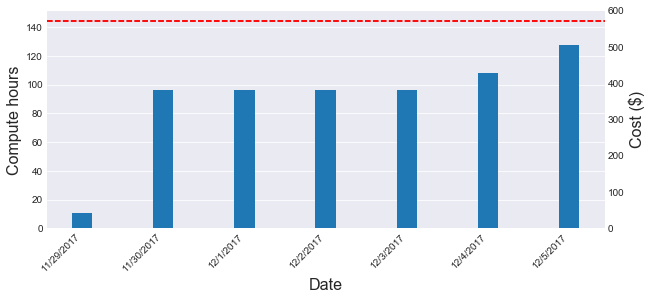

In [26]:
mask = meshB2k35r1_data['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35r1_data[mask]

dates = subdata['Date'].values
hours = subdata['Quantity'].values
costs = subdata['Cost'].values

fig, ax1 = pyplot.subplots(figsize=(10.0, 4.0))
ax1.yaxis.grid(zorder=0)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Compute hours', fontsize=16)
bar_width = 0.25
ax1.bar(numpy.arange(dates.size), hours,
        bar_width, zorder=1)
ax1.axhline(24.0 * n_nodes, color='red', linestyle='--')
ax1.set_xticks(numpy.arange(dates.size))
ax1.set_xticklabels(dates)
for label in ax1.get_xmajorticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

ax2 = ax1.twinx()
ax2.set_ylabel('Cost ($)', fontsize=16)
ax2.bar(numpy.arange(dates.size), costs,
        bar_width, zorder=1)
ax2.axhline(24.0 * n_nodes * nc24r_price, color='red', linestyle='--');

The figure above shows the number of compute hours and the cost charged daily when the task was running.
The dashed red line shows the values as if the simulation was computing during the full day.

## Re=2,000, AoA=35$^o$ (mesh B) - second restart

Finally, we restarted the simulation one last time to compute additional time units (and avoiding the time-limit enforced on Azure Batch tasks).
The task was submitted on December 7, 2017, at 7:20 pm and completed by December 11, 2017, at 4:10 am.

In [27]:
start, end = '2017-12-05', '2017-12-11'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
meshB2k35r2_data = data[mask]

Within this period, we have been charged for `Virtual Machines`, `Data Management`, `Storage`, and `Networking`, with most of the cost incurred by the use of virtual machines.

In [28]:
service_names = meshB2k35r2_data['ServiceName'].unique()
for name in service_names:
    mask = meshB2k35r2_data['ServiceName'] == name
    print('- {}: ${:.2f}'.format(name, meshB2k35r2_data[mask]['Cost'].sum()))

- Data Management: $1.04
- Networking: $17.06
- Storage: $11.93
- Virtual Machines: $1971.29


##### Compute hours

In [29]:
mask = meshB2k35r2_data['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35r2_data[mask]

total_hours = subdata['Quantity'].sum()
print('- Total number of compute hours: {:.2f}'.format(total_hours))
print('- Number of compute hours per node: {:.2f}'.format(total_hours / n_nodes))
print('- Expected charge for the compute hours: ${:.2f}'
      .format(total_hours * nc24r_price))
print('- Reported charge: ${:.2f}'.format(subdata['Cost'].sum()))

- Total number of compute hours: 497.80
- Number of compute hours per node: 82.97
- Expected charge for the compute hours: $1971.29
- Reported charge: $1971.29


For this task, we have been charged, for the virtual machines, for about 497.8 compute hours (or 83.0 hours per node) with the cost of $1971.3.

The duration of the task (from submission to completion) is about 81 hours, which is also the runtime reported by PETSc.

This time the number of compute hours per node being charged exceeds the task runtime.
This is explained by the fact that on December 7, 2017, I had trouble restarting the simulation.

So let's redo the cost estimation, assuming that the simulation run from 7:20 pm to midnight on December 7, 2017.

In [30]:
mask = meshB2k35r2_data['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35r2_data[mask]

hours = subdata['Quantity'].values
# First day: assume run from 7:20 pm to midnight
hours[0] = (4.0 + 40.0 / 60) * n_nodes
total_hours = hours.sum()
print('- Total number of compute hours: {:.2f}'.format(total_hours))
print('- Number of compute hours per node: {:.2f}'.format(total_hours / n_nodes))
print('- Expected charge for the compute hours: ${:.2f}'
      .format(total_hours * nc24r_price))
costs = subdata['Cost'].values
# First day: assume run from 7:20 pm to midnight
costs[0] = (4.0 + 40.0 / 60) * n_nodes * nc24r_price
print('- Reported charge: ${:.2f}'.format(costs.sum()))

- Total number of compute hours: 398.13
- Number of compute hours per node: 66.36
- Expected charge for the compute hours: $1576.61
- Reported charge: $1576.61


Now, the number of compute hours per node is 66 hours, which is below the runtime of the task (or the PETSc runtime).

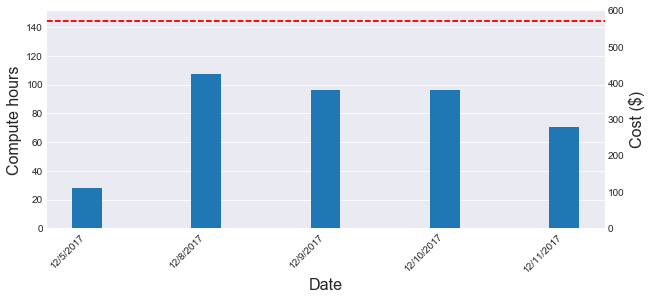

In [ ]:
mask = meshB2k35r2_data['ServiceName'] == 'Virtual Machines'
subdata = meshB2k35r2_data[mask]

dates = subdata['Date'].values
hours = subdata['Quantity'].values
costs = subdata['Cost'].values
# First day: assume run from 7:20 pm to midnight
hours[0] = (4.0 + 40.0 / 60) * n_nodes
costs[0] = (4.0 + 40.0 / 60) * n_nodes * nc24r_price

fig, ax1 = pyplot.subplots(figsize=(10.0, 4.0))
ax1.yaxis.grid(zorder=0)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Compute hours', fontsize=16)
bar_width = 0.25
ax1.bar(numpy.arange(dates.size), hours,
        bar_width, zorder=1)
ax1.axhline(24.0 * n_nodes, color='red', linestyle='--')
ax1.set_xticks(numpy.arange(dates.size))
ax1.set_xticklabels(dates)
for label in ax1.get_xmajorticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

ax2 = ax1.twinx()
ax2.set_ylabel('Cost ($)', fontsize=16)
ax2.bar(numpy.arange(dates.size), costs,
        bar_width, zorder=1)
ax2.axhline(24.0 * n_nodes * nc24r_price, color='red', linestyle='--');

The figure above shows the number of compute hours and the cost charged daily when the task was running.
The dashed red line shows the values as if the simulation was computing during the full day.

### Extra simulations

The simulations on the coarse mesh (2k30 and 1k35) started on December 22, 2017, at 12:30 pm.
Each simulation ran on with two NC24r instances.
The 1k35 run completed 100,000 time steps by December 27, 2017, at 6 am.
The PETSc log reports a runtime of 113.5 hours.

The 2k30 run completed 100,000 time steps by December 29, 2017, 9:50 am.
The PETSc log reports a runtime of 165.36 hours.

In [ ]:
start, end = '2017-12-22', '2017-12-29'
mask = ((pandas.to_datetime(data['Date']) >= start) &
        (pandas.to_datetime(data['Date']) <= end))
meshAextra_data = data[mask]

In [ ]:
service_names = meshAextra_data['ServiceName'].unique()
for name in service_names:
    mask = meshAextra_data['ServiceName'] == name
    print('- {}: ${:.2f}'.format(name, meshAextra_data[mask]['Cost'].sum()))

##### Compute hours (Virtual Machines)

In [ ]:
mask = meshAextra_data['ServiceName'] == 'Virtual Machines'
subdata = meshAextra_data[mask]

n_nodes = 4

total_hours = subdata['Quantity'].sum()
print('- Total number of compute hours: {:.2f}'.format(total_hours))
print('- Number of compute hours per node: {:.2f}'.format(total_hours / n_nodes))
print('- Calculated charge for the compute hours: ${:.2f}'
      .format(total_hours * nc24r_price))
print('- Reported charge: ${:.2f}'.format(subdata['Cost'].sum()))

The difference between the calculated and reported charges for the compute hours is explained by the fact that the two simulations did not finish at the same time.

In [ ]:
mask = meshAextra_data['ServiceName'] == 'Virtual Machines'
subdata = meshAextra_data[mask]

# Neglecting first entry because tasks failed due to HDF5 library
dates = subdata['Date'].values[1:]
hours = subdata['Quantity'].values[1:]
costs = subdata['Cost'].values[1:]

fig, ax1 = pyplot.subplots(figsize=(10.0, 4.0))
ax1.yaxis.grid(zorder=0)
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('Compute hours', fontsize=16)
bar_width = 0.25
ax1.bar(numpy.arange(dates.size), hours,
        bar_width, zorder=1)
ax1.axhline(24.0 * n_nodes, color='red', linestyle='--')
ax1.set_xticks(numpy.arange(dates.size))
ax1.set_xticklabels(dates)
for label in ax1.get_xmajorticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

ax2 = ax1.twinx()
ax2.set_ylabel('Cost ($)', fontsize=16)
ax2.bar(numpy.arange(dates.size), costs,
        bar_width, zorder=1)
ax2.axhline(24.0 * n_nodes * nc24r_price, color='red', linestyle='--');

##### Networking (data transfer)

In [ ]:
mask = meshAextra_data['ServiceName'] == 'Networking'
subdata = meshAextra_data[mask]
print('Networking charge: ${:.2f}'.format(subdata['Cost'].sum()))

The numerical solution for the simulation at Reynolds number 1,000 and a snake at a 35-degree angle of attack was transferred from Azure Storage to our local machine on December 22, 2017.
The numerical solution for the second simulation was transferred two days later.
Each data transfer cost about 6.0 USD.

In [ ]:
mask = ((pandas.to_datetime(meshAextra_data['Date']) == '2017-12-27') |
        (pandas.to_datetime(meshAextra_data['Date']) == '2017-12-29'))
subdata = meshAextra_data[mask]
mask = ((subdata['ServiceName'] == 'Networking') &
        (subdata['ServiceResource'] == 'Data Transfer Out (GB)'))
subdata[mask]

##### Data management

In [ ]:
mask = meshAextra_data['ServiceName'] == 'Data Management'
subdata = meshAextra_data[mask]
service_resources = subdata['ServiceResource'].unique()
print('Data Management costs:')
for resource in service_resources:
    mask = subdata['ServiceResource'] == resource
    cost = subdata[mask]['Cost'].sum()
    print('- {}: ${:.2f}'.format(resource, cost))